## Healthy Communities - Making Maps

Andrew Cistola

#### Creating Maps from Variables of Interest

Below is a process for displaying two variables of interest, the health outcome and the selected social variable determined from the model, in a state wide map. This notebook uses the data generated through the Random Forest process.

#### Prepare Libraries and Directory

In [2]:
import os
import pandas as pd
import numpy as np
import geopandas as gp
import matplotlib.pyplot as plt
import folium as fol

os.chdir("C:/Users/drewc/Documents/healthy_neighborhoods")

#### Step 1: Import Shape File

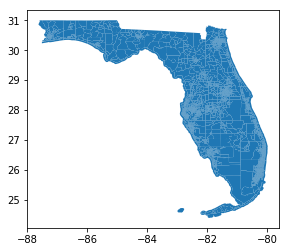

In [4]:
flct = gp.read_file("maps/tl_2017_12_tract/tl_2017_12_tract.shp")
flct.plot()

#### Step 2: Prep Shape FIle for Merge

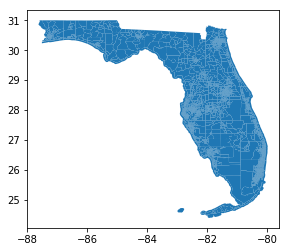

In [5]:
flct["GEOID"] = flct["GEOID"].fillna(0).astype(np.int64)
flct.dtypes
flct.plot()

#### Step 3: Import Health Outcome and Population Variables

In [7]:
dmcol = pd.read_csv("maps/maps_data_dmcol.csv")
dmcol.dtypes

GEOID                  int64
Diabetes.Mellitus    float64
College.Educated     float64
dtype: object

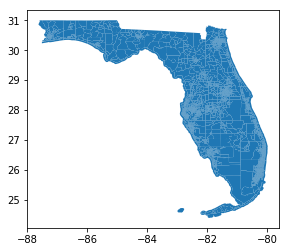

In [8]:
merged = flct.set_index("GEOID").join(dmcol.set_index("GEOID"))
merged.plot()

#### Step 4: Prepare the Map for Health Outcome

In [16]:
colors = 9
cmap = 'Blues'
figsize = (16, 10)
title = "Diabetes Mortality Rate by Census Tract in Florida, 2013-2017"

#### Step 5: Create Map for Health Outcome

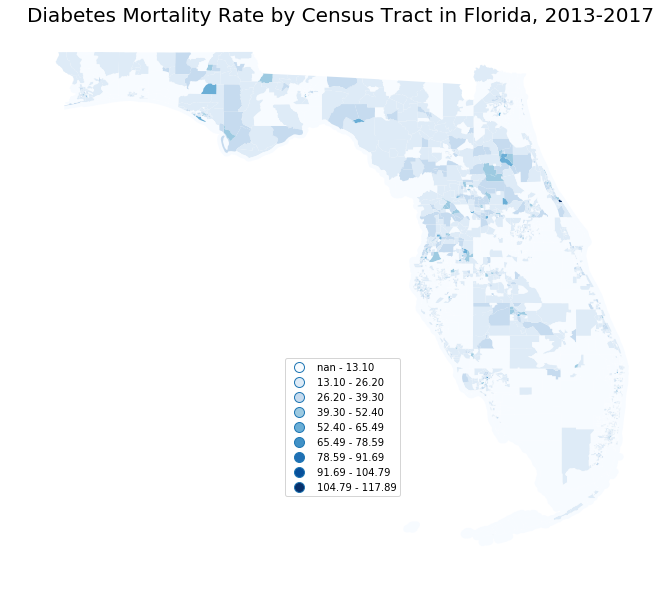

In [18]:
dmap = merged.plot(column="Diabetes.Mellitus",
                 cmap=cmap,
                 figsize=figsize,
                 scheme='equal_interval',
                 k=colors,
                 legend=True)
dmap.set_axis_off()
dmap.set_title(title, fontdict={'fontsize': 20}, loc='left')
dmap.get_legend().set_bbox_to_anchor((.6, .4))
plt.savefig("maps/maps_map_dm.jpeg", dpi = 1000)

#### Step 6: Repeat for Social Variable

In [19]:
colors = 9
cmap = "Oranges"
figsize = (16, 10)
title = "College Education Rate by Census Tract in Florida, 2013-2017"

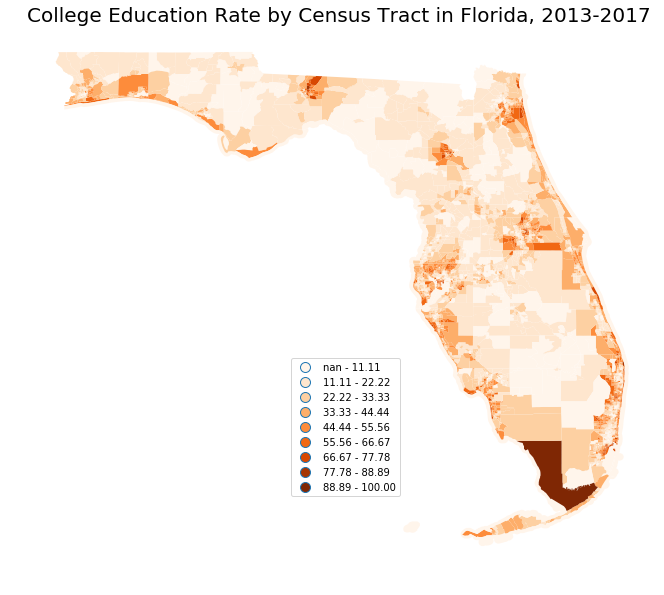

In [20]:
cemap = merged.plot(column="College.Educated",
                 cmap=cmap,
                 figsize=figsize,
                 scheme='equal_interval',
                 k=colors,
                 legend=True)
cemap.set_axis_off()
cemap.set_title(title, fontdict={'fontsize': 20}, loc='left')
cemap.get_legend().set_bbox_to_anchor((.6, .4))
plt.savefig("maps/maps_map_ce.jpeg", dpi = 1000)